In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PRCurve import PRCurve
from ROCCurve import ROCCurve, MicroROCCurve, MacroROCCurve
from Utils import Area, Plot

In [10]:
def ideal_classifier(n, frac_1):
    preds = np.arange(n) / n
    labels = np.zeros(n)
    labels[-int(n * frac_1):] = 1
    return preds, labels

def worth_classifier(n, frac_1):
    preds = np.arange(n) / n
    labels = np.zeros(n)
    labels[:int(n * frac_1)] = 1
    return preds, labels

def random_classifier(n, frac_1):
    preds = np.random.rand(n)
    labels = np.zeros(n)
    labels[:int(n * frac_1)] = 1
    return preds, labels

In [ ]:
preds, labels = random_classifier(100, 0.3)
pr_curve = PRCurve(preds, labels)
roc_curve = ROCCurve(preds, labels)

print("AUC-PR = ", Area(pr_curve))
print("AUC-ROC = ", Area(roc_curve))

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
Plot(pr_curve, axs[0])
Plot(roc_curve, axs[1])
plt.show()

In [4]:
def random_classifier_with_confidence(n, accuracy):
    trues = np.random.rand(n) < accuracy
    labels = np.random.randint(0, 2, n)
    conf = np.random.rand(n)
    preds = np.where(trues, labels, 1 - labels)
    return np.where(preds, conf, 1 - conf), labels
    # labels = np.array(np.random.rand(n) > accuracy, dtype=int)
    # conf = np.random.rand(n)
    # preds = np.where(labels, conf, 1 - conf)
    # return preds, labels

In [5]:
TP = lambda p, l: np.sum(p*l)
TN = lambda p, l: np.sum((1-p)*(1-l))
FP = lambda p, l: np.sum(p*(1-l))
FN = lambda p, l: np.sum((1-p)*l)

In [ ]:
preds, labels = random_classifier_with_confidence(1000, 0.3)
pr_curve = PRCurve(preds, labels)
roc_curve = ROCCurve(preds, labels)

print("AUC-PR = ", Area(pr_curve))
print("AUC-ROC = ", Area(roc_curve))

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
Plot(pr_curve, axs[0])
Plot(roc_curve, axs[1])
plt.show()

In [7]:
thr = 0.5
print(TP(preds>thr, labels))
print(TN(preds>thr, labels))
print(FP(preds>thr, labels))
print(FN(preds>thr, labels))

246
243
265
246


In [30]:
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)

classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=np.random.RandomState(0))
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

rocCurves = np.empty(3, dtype=object)
mean = 0
for i in range(3):
    rocCurves[i] = ROCCurve(y_score[:,i], y_test[:, i])
    # print("Class %d AUC-ROC = %f" % (i, Area(rocCurves[i])))
microROC = MicroROCCurve(y_score, y_test)
macroROC = MacroROCCurve(y_score, y_test)
np.sum(y_test, 0)


array([21, 30, 24])

In [31]:
for i in [0,1,2]:
    print("Class %d AUC-ROC = %f" % (i, Area(rocCurves[i])))
print("Macro AUC-ROC = %f" % (Area(macroROC)))
print("Micro AUC-ROC = %f" % (Area(microROC)))

Class 0 AUC-ROC = 1.000000
Class 1 AUC-ROC = 0.720000
Class 2 AUC-ROC = 0.995098
Macro AUC-ROC = 0.937289
Micro AUC-ROC = 0.942870


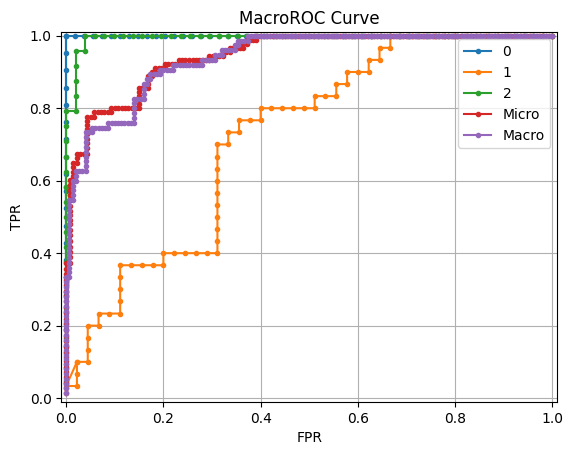

In [32]:
Plot(rocCurves[0], label='0')
Plot(rocCurves[1], label='1')
Plot(rocCurves[2], label='2')
Plot(microROC, label='Micro')
Plot(macroROC, label='Macro')
plt.legend()
plt.show()